In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [11]:
df = pd.read_csv("../data/landslideCleaned.csv")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   event_id                   11033 non-null  int64  
 1   event_date                 11033 non-null  object 
 2   event_time                 11033 non-null  object 
 3   landslide_category         11032 non-null  object 
 4   landslide_trigger          11010 non-null  object 
 5   landslide_size             11024 non-null  object 
 6   landslide_setting          10964 non-null  object 
 7   fatality_count             9648 non-null   float64
 8   injury_count               5359 non-null   float64
 9   country_name               9471 non-null   object 
 10  country_code               9469 non-null   object 
 11  admin_division_name        9396 non-null   object 
 12  admin_division_population  9471 non-null   float64
 13  gazeteer_closest_point     9470 non-null   obj

In [13]:
df['event_hour'] = df['event_time'].apply(lambda x: x.split(':')[0]).astype(int)

In [14]:
df['event_am_pm'] = np.where(df['event_hour'] >= 12, 'PM', 'AM')

C:\Users\deshr\AppData\Local\Temp\ipykernel_45872\3902305825.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='event_am_pm', data=df, palette='coolwarm')


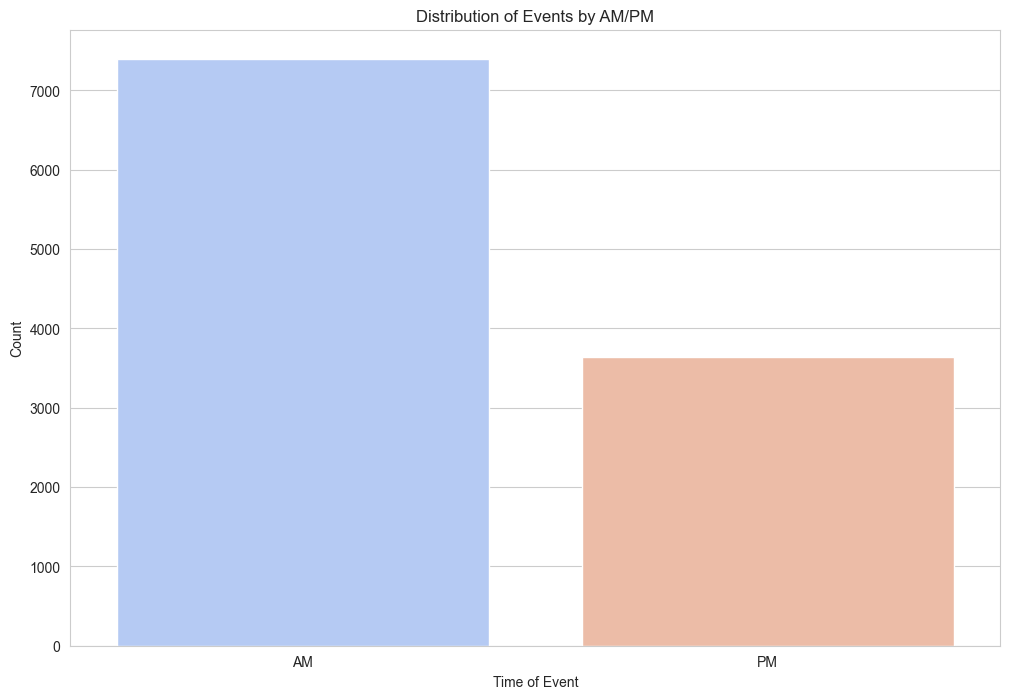

In [15]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")


sns.countplot(x='event_am_pm', data=df, palette='coolwarm')


plt.xlabel("Time of Event")
plt.ylabel("Count")
plt.title("Distribution of Events by AM/PM")


plt.show()

In [16]:
# m = folium.Map(location=[df["latitude"].mean(), df["longitude"].mean()], zoom_start=5)

# # Add markers for each location
# for _, row in df.iterrows():
#     folium.Marker(
#         location=[row["latitude"], row["longitude"]],
#         popup=f"Location: ({row['latitude']}, {row['longitude']})",
#         icon=folium.Icon(color="blue", icon="info-sign")
#     ).add_to(m)

# # Save map as an HTML file (optional)
# m.save("event_locations_map.html")

# # Display map
# m

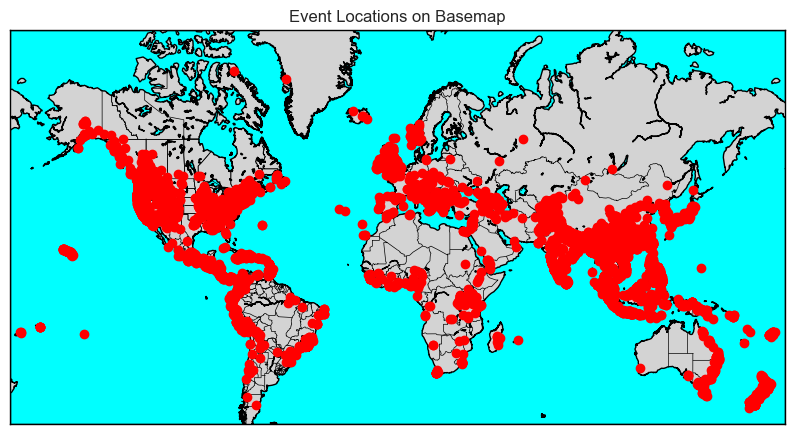

In [17]:

plt.figure(figsize=(10, 6))


m = Basemap(projection="merc", llcrnrlat=df["latitude"].min()-5, urcrnrlat=df["latitude"].max()+5,
            llcrnrlon=df["longitude"].min()-5, urcrnrlon=df["longitude"].max()+5, resolution="l")

# Draw map features
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color="lightgray", lake_color="aqua")
m.drawmapboundary(fill_color="aqua")

# Convert latitude and longitude to map coordinates
x, y = m(df["longitude"].values, df["latitude"].values)

# Plot the points
m.scatter(x, y, marker="o", color="red", zorder=5)

# Add a title
plt.title("Event Locations on Basemap")

# Show the plot
plt.show()